In [ ]:
import cv2
import os
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
def get_segments(image,path):

    fh = open(path+"coords.txt",'a+')
    towrite=""
    #read image
    img = cv2.imread(image)

    #grayscale
    gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

    #binarize 
    ret,thresh = cv2.threshold(gray,127,255,cv2.THRESH_BINARY_INV)


    #find contours
    im2,ctrs, hier = cv2.findContours(thresh.copy(), cv2.RETR_EXTERNAL, 
    cv2.CHAIN_APPROX_SIMPLE)

    #sort contours
    sorted_ctrs = sorted(ctrs, key=lambda ctr: cv2.boundingRect(ctr)[0])

    for i, ctr in enumerate(sorted_ctrs):
        # Get bounding box
        x, y, w, h = cv2.boundingRect(ctr)
        
        towrite+=str(x)+','+str(y)+','+str(w)+','+str(h)+"\n"

        # Getting ROI
        roi = img[y:y+h, x:x+w]

        # show ROI
        cv2.imwrite(path+str(i)+'.png', roi)
#         cv2.imshow('charachter'+str(i), roi)
        cv2.rectangle(img,(x,y),( x + w, y + h ),(90,0,255),2)
#         cv2.waitKey(0)

    fh.write(towrite)
#     cv2.imshow('marked areas',img)
#     cv2.waitKey(0)

In [ ]:
PATH = '../data/data_png_TrainINKML_2013/'
files = os.listdir(PATH)
count=1
NEW_PATH = '../data/segmented/'+PATH.split("/")[-2]+'/'
os.mkdir(NEW_PATH)
for file in files:
    temp_path = NEW_PATH+file.split('.png')[0]+'/'
    os.mkdir(temp_path)
    get_segments(PATH+file,temp_path)
    print(count)
    count+=1

# Watershed Algorithm

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi

from skimage.morphology import watershed
from skimage.feature import peak_local_max
import cv2

In [5]:
# image = cv2.imread('../data/data_png_trainData_2012/TrainData2_0_sub_41.png')
image = cv2.imread('../data/data_png_TrainINKML_2013/2009220-1327-79.png')
#grayscale
gray = cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)

#binarize 
ret,thresh = cv2.threshold(gray,250,255,cv2.THRESH_BINARY_INV)

image = thresh

# Generate an initial image with two overlapping circles
# x, y = np.indices((80, 80))
# x1, y1, x2, y2 = 28, 28, 44, 52
# r1, r2 = 16, 20
# mask_circle1 = (x - x1)**2 + (y - y1)**2 < r1**2
# mask_circle2 = (x - x2)**2 + (y - y2)**2 < r2**2
# image = np.logical_or(mask_circle1, mask_circle2)

In [6]:
cv2.THRESH_BINARY_INV

1

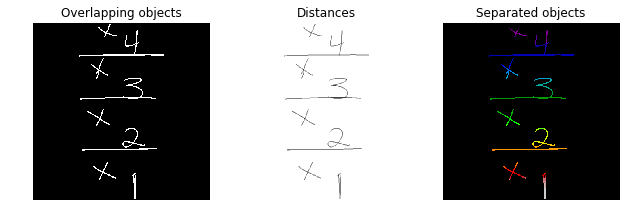

In [7]:
distance = ndi.distance_transform_edt(image)
local_maxi = peak_local_max(distance, indices=False, footprint=np.ones((3, 3)),labels=image)
markers = ndi.label(local_maxi)[0]
labels = watershed(-distance, markers, mask=image)

fig, axes = plt.subplots(ncols=3, figsize=(9, 3), sharex=True, sharey=True)
ax = axes.ravel()

ax[0].imshow(image, cmap=plt.cm.gray, interpolation='nearest')
ax[0].set_title('Overlapping objects')
ax[1].imshow(-distance, cmap=plt.cm.gray, interpolation='nearest')
ax[1].set_title('Distances')
ax[2].imshow(labels, cmap=plt.cm.nipy_spectral, interpolation='nearest')
ax[2].set_title('Separated objects')

for a in ax:
    a.set_axis_off()

fig.tight_layout()
plt.show()